In [1]:
#Import Libraries
import random
import numpy as np
import pandas as pd
import seaborn as ss
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Loading Data
Kdd_Cup_Data = pd.read_csv("...../PHY_TRAIN.csv",index_col=0)

In [3]:
#Viewing Data
Kdd_Cup_Data

,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78
exampleid,,,,,,,,,,,,,,,,,,,,,
1,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,0.876238,...,-1,-0.036906,-0.000724,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
2,0,0.920167,0.817883,-0.646473,-1,0.000000,0.0,0.000000,0,0.401383,...,-1,-0.999927,-0.012102,0.920167,0.817883,-0.646473,-1,1,0.302235,0.950770
3,1,0.868397,0.178202,0.150828,-1,0.000000,0.0,0.000000,0,0.773496,...,1,0.908824,0.550843,0.868397,0.178202,0.150828,-1,1,0.001421,0.882853
4,0,0.000000,0.000000,0.000000,0,1.577894,0.0,-0.369792,-1,1.417021,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
5,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,1.105217,...,1,0.000005,0.400702,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,0.706219,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49997,1,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,0.309307,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49998,1,0.918590,1.012605,-0.047045,-1,0.000000,0.0,0.000000,0,1.982100,...,0,0.000000,0.000000,0.918590,1.012605,-0.047045,-1,1,0.014583,0.850662


In [4]:
#Number of Rows and Columns
print ('The KDD Cup 2004 dataset has {0} rows and {1} columns'.format(Kdd_Cup_Data.shape[0],Kdd_Cup_Data.shape[1]))

The KDD Cup 2004 dataset has 50000 rows and 79 columns


In [5]:
#Number of Numeric and Categorical Columns
print ("There are {} numeric and {} categorical columns in the KDD Cup 2004 dataset".format(Kdd_Cup_Data.select_dtypes(include=[np.number]).shape[1],Kdd_Cup_Data.select_dtypes(exclude=[np.number]).shape[1]))

There are 79 numeric and 0 categorical columns in the KDD Cup 2004 dataset


In [6]:
#Information of Data
Kdd_Cup_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 79 columns):
target    50000 non-null int64
feat1     50000 non-null float64
feat2     50000 non-null float64
feat3     50000 non-null float64
feat4     50000 non-null int64
feat5     50000 non-null float64
feat6     50000 non-null float64
feat7     50000 non-null float64
feat8     50000 non-null int64
feat9     50000 non-null float64
feat10    50000 non-null float64
feat11    50000 non-null float64
feat12    50000 non-null int64
feat13    50000 non-null float64
feat14    50000 non-null float64
feat15    50000 non-null float64
feat16    50000 non-null int64
feat17    50000 non-null int64
feat18    50000 non-null float64
feat19    50000 non-null float64
feat20    15798 non-null float64
feat21    15798 non-null float64
feat22    15798 non-null float64
feat23    50000 non-null float64
feat24    50000 non-null float64
feat25    50000 non-null float64
feat26    50000 non-null float64
feat27    50

In [7]:
#Summary of Data
display(Kdd_Cup_Data.describe().transpose())
#(Kdd_Cup_Data.describe().transpose()).to_csv("..../Summary_Data.csv")

,count,mean,std,min,25%,50%,75%,max
target,50000.0,0.497220,0.499997,0.0,0.0,0.0,1.0,1.000000
feat1,50000.0,0.155606,0.414875,0.0,0.0,0.0,0.0,2.639020
feat2,50000.0,0.084876,0.295335,0.0,0.0,0.0,0.0,3.429590
feat3,50000.0,-0.050354,0.253748,-1.0,0.0,0.0,0.0,0.999954
feat4,50000.0,-0.000060,0.392916,-1.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...
feat74,50000.0,-0.014101,0.176896,-1.0,0.0,0.0,0.0,0.999869
feat75,50000.0,-0.001460,0.295939,-1.0,0.0,0.0,0.0,1.000000
feat76,50000.0,0.094480,0.315841,0.0,0.0,0.0,0.0,3.000000
feat77,50000.0,0.002843,0.019081,0.0,0.0,0.0,0.0,0.385513


In [8]:
#Skewness of Data
Kdd_Cup_Data.skew(axis = 0, skipna = True)
#Kdd_Cup_Data.skew(axis = 0, skipna = True).to_csv("..../Skewness.csv")

target     0.011121
feat1      2.826244
feat2      4.424666
feat3     -1.562475
feat4     -0.000531
            ...    
feat74    -1.419218
feat75    -0.041533
feat76     3.464927
feat77    12.112726
feat78     3.223882
Length: 79, dtype: float64

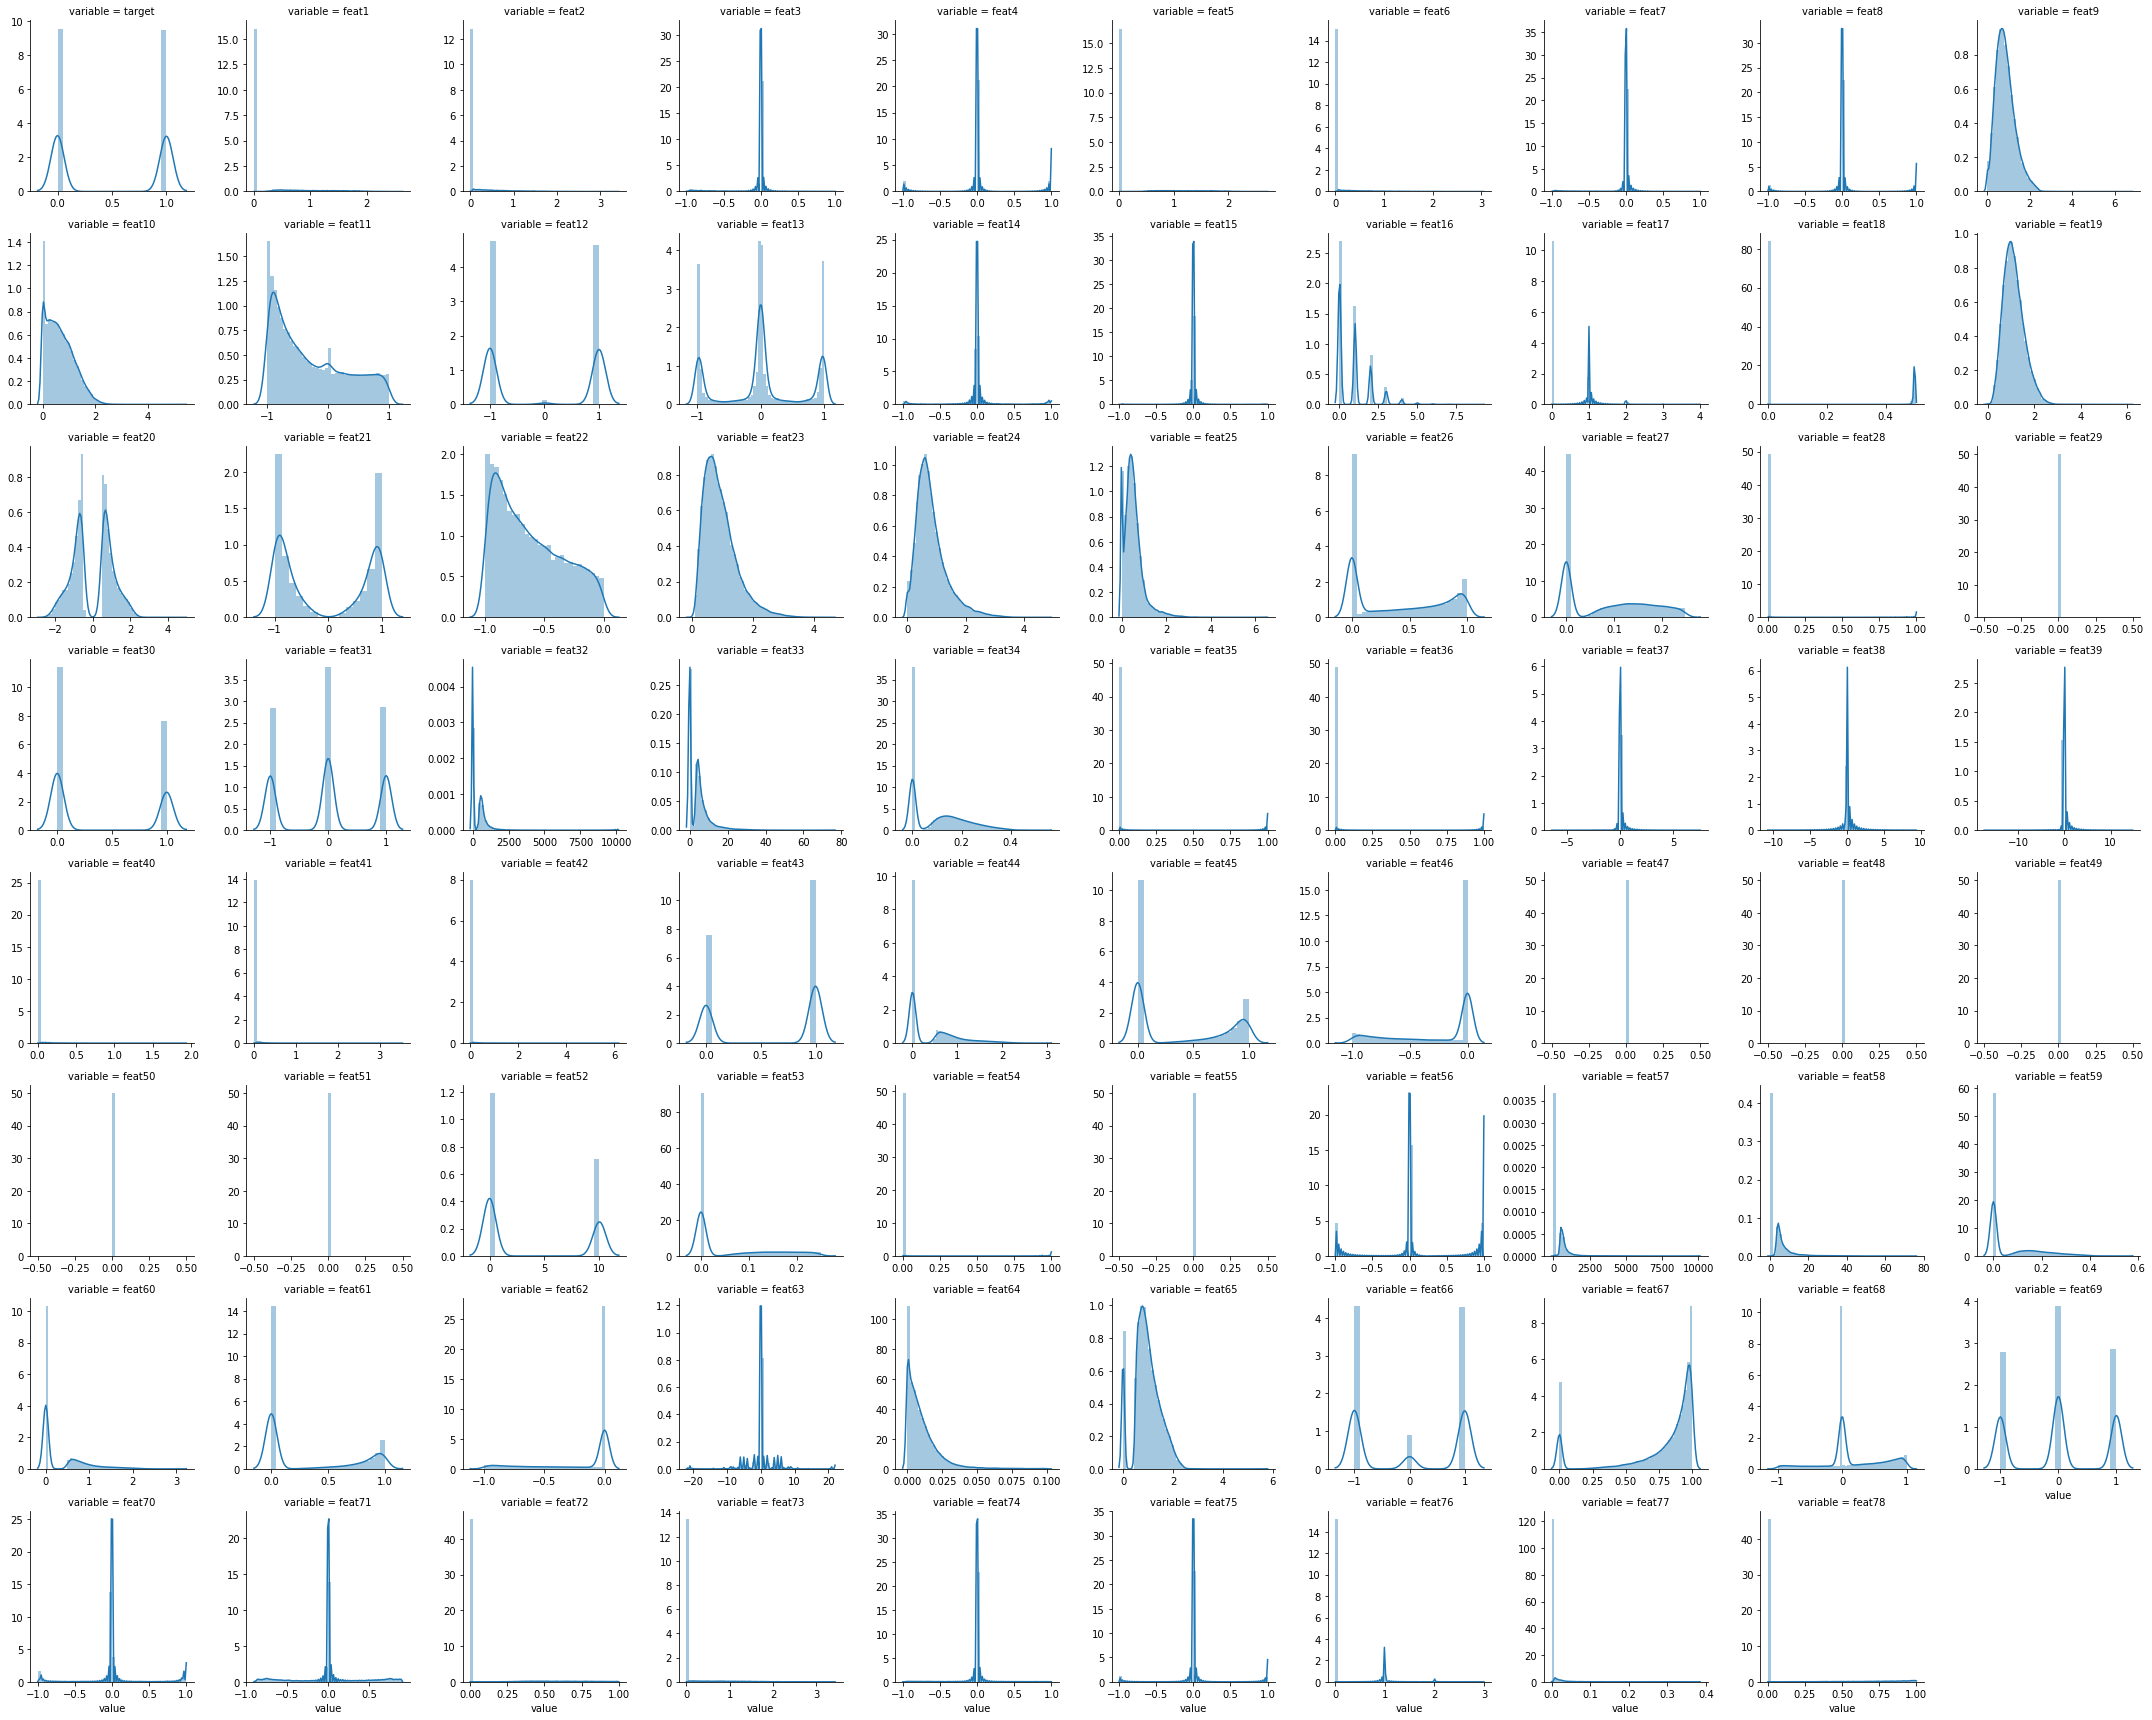

In [9]:
#Create numeric plots
num_pic = [f for f in Kdd_Cup_Data.columns if Kdd_Cup_Data.dtypes[f] != 'object']
num = pd.melt(Kdd_Cup_Data, value_vars = num_pic)
n_p = ss.FacetGrid (num, col='variable', col_wrap=10, sharex=False, sharey = False)
n_p.map(ss.distplot, 'value');

#As you can see, most of the variables are not skewed. We'll have to transform them in the next stage.

In [10]:
#Missing value indicators for all variables with missing values as 1 else 0
Missing_Indi = Kdd_Cup_Data.isnull().astype(int).add_suffix('_indicator')
#Missing_Indi.to_csv("...../Missing_Value_Indicator.csv")

#Column names with missing values
Missing_Indi.columns[(Missing_Indi == 1).any()]

Index(['feat20_indicator', 'feat21_indicator', 'feat22_indicator',
       'feat29_indicator', 'feat44_indicator', 'feat45_indicator',
       'feat46_indicator', 'feat55_indicator'],
      dtype='object')

In [11]:
#Handling Null Values
Nul_C = pd.DataFrame(Kdd_Cup_Data.isnull().sum().sort_values(ascending=False)[:10])
Nul_P = pd.DataFrame(round(Kdd_Cup_Data.isnull().sum().sort_values(ascending = False)/len(Kdd_Cup_Data)*100,2)[round(Kdd_Cup_Data.isnull().sum().sort_values(ascending = False)/len(Kdd_Cup_Data)*100,2) != 0])
Nul_data = pd.concat([Nul_C,Nul_P],axis=1, sort=False)
Nul_data.columns = ['Null Count','Null Percent']
Nul_data.index.name = 'Feature'
Nul_data
#Nul_data.to_csv("..../Null_Data_Values.csv")

,Null Count,Null Percent
Feature,,
feat21,34202,68.40
feat20,34202,68.40
feat22,34202,68.40
feat29,30062,60.12
feat55,18602,37.20
feat44,14469,28.94
feat45,14469,28.94
feat46,14469,28.94
feat32,0,NaN


In [12]:
#Replacing missing data with the median values
Kdd_Cup_Data.feat20=Kdd_Cup_Data.feat20.fillna(Kdd_Cup_Data.feat20.median())
Kdd_Cup_Data.feat21=Kdd_Cup_Data.feat21.fillna(Kdd_Cup_Data.feat21.median())
Kdd_Cup_Data.feat22=Kdd_Cup_Data.feat22.fillna(Kdd_Cup_Data.feat22.median())
Kdd_Cup_Data.feat29=Kdd_Cup_Data.feat29.fillna(Kdd_Cup_Data.feat29.median())
Kdd_Cup_Data.feat44=Kdd_Cup_Data.feat44.fillna(Kdd_Cup_Data.feat44.median())
Kdd_Cup_Data.feat45=Kdd_Cup_Data.feat45.fillna(Kdd_Cup_Data.feat45.median())
Kdd_Cup_Data.feat46=Kdd_Cup_Data.feat46.fillna(Kdd_Cup_Data.feat46.median())
Kdd_Cup_Data.feat55=Kdd_Cup_Data.feat55.fillna(Kdd_Cup_Data.feat55.median())

In [13]:
#Check remaining missing values if any 
whole_na = (Kdd_Cup_Data.isnull().sum() / len(Kdd_Cup_Data)) * 100
whole_na = whole_na.drop(whole_na[whole_na == 0].index).sort_values(ascending=False)
missing_part = pd.DataFrame({'Missing Ratio' :whole_na})
missing_part.head()

,Missing Ratio


In [14]:
#Correlation score to explain relationship between dependent variable and independent variable
cor = Kdd_Cup_Data.corr()
print("The Top variables highly correlated with Target")
print (cor['target'].sort_values(ascending=False)[:10], '\n') 

The Top variables highly correlated with Target
target    1.000000
feat13    0.395329
feat20    0.296315
feat70    0.291616
feat71    0.253053
feat66    0.248508
feat69    0.223020
feat8     0.149645
feat4     0.129852
feat12    0.103610
Name: target, dtype: float64 



In [15]:
#Correlation Analysis among features

# Generate correlation matrix
corr_matrix = Kdd_Cup_Data.corr().abs()

# Choose upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

# Find index of variable columns with correlation greater than 0.60
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]
print(to_drop)

# Delete Marked Variables
Kdd_Cup_Data.drop(to_drop, axis=1, inplace=True)

['feat7', 'feat18', 'feat19', 'feat27', 'feat30', 'feat34', 'feat40', 'feat41', 'feat43', 'feat45', 'feat46', 'feat52', 'feat53', 'feat58', 'feat59', 'feat60', 'feat61', 'feat62', 'feat63', 'feat65', 'feat67', 'feat69', 'feat70', 'feat71', 'feat73', 'feat74', 'feat75', 'feat76', 'feat78']


In [16]:
#Display Important variables
print("Number of total features are",len(Kdd_Cup_Data.columns))
print()
print("The important variables are:",list(Kdd_Cup_Data.columns))

Number of total features are 50

The important variables are: ['target', 'feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6', 'feat8', 'feat9', 'feat10', 'feat11', 'feat12', 'feat13', 'feat14', 'feat15', 'feat16', 'feat17', 'feat20', 'feat21', 'feat22', 'feat23', 'feat24', 'feat25', 'feat26', 'feat28', 'feat29', 'feat31', 'feat32', 'feat33', 'feat35', 'feat36', 'feat37', 'feat38', 'feat39', 'feat42', 'feat44', 'feat47', 'feat48', 'feat49', 'feat50', 'feat51', 'feat54', 'feat55', 'feat56', 'feat57', 'feat64', 'feat66', 'feat68', 'feat72', 'feat77']


In [17]:
Kdd_Cup_Data

,target,feat1,feat2,feat3,feat4,feat5,feat6,feat8,feat9,feat10,...,feat51,feat54,feat55,feat56,feat57,feat64,feat66,feat68,feat72,feat77
exampleid,,,,,,,,,,,,,,,,,,,,,
1,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.876238,0.079785,...,0,7.133022e-07,0.0,1,546.8750,0.016244,-1,-0.090240,0.000000,0.000000
2,0,0.920167,0.817883,-0.646473,-1,0.000000,0.0,0,0.401383,0.471188,...,0,1.751311e-04,0.0,1,800.7812,0.008337,1,0.740574,0.920167,0.302235
3,1,0.868397,0.178202,0.150828,-1,0.000000,0.0,0,0.773496,1.046599,...,0,2.699460e-06,0.0,-1,0.0000,0.001421,-1,0.950403,0.868397,0.001421
4,0,0.000000,0.000000,0.000000,0,1.577894,0.0,-1,1.417021,0.432868,...,0,0.000000e+00,0.0,0,0.0000,0.004666,-1,0.000000,0.000000,0.000000
5,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0,1.105217,0.824695,...,0,0.000000e+00,0.0,0,0.0000,0.008910,-1,0.196971,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.706219,0.182617,...,0,0.000000e+00,0.0,0,0.0000,0.001268,1,0.000000,0.000000,0.000000
49997,1,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.309307,0.112121,...,0,0.000000e+00,0.0,0,0.0000,0.009239,1,0.000000,0.000000,0.000000
49998,1,0.918590,1.012605,-0.047045,-1,0.000000,0.0,0,1.982100,0.000000,...,0,0.000000e+00,0.0,0,0.0000,0.015940,1,0.000000,0.918590,0.014583


In [18]:
# Divide dependent and independent variables
X=Kdd_Cup_Data.iloc[:,1:80]
y=Kdd_Cup_Data['target']

In [19]:
X

,feat1,feat2,feat3,feat4,feat5,feat6,feat8,feat9,feat10,feat11,...,feat51,feat54,feat55,feat56,feat57,feat64,feat66,feat68,feat72,feat77
exampleid,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.876238,0.079785,-0.848659,...,0,7.133022e-07,0.0,1,546.8750,0.016244,-1,-0.090240,0.000000,0.000000
2,0.920167,0.817883,-0.646473,-1,0.000000,0.0,0,0.401383,0.471188,0.601652,...,0,1.751311e-04,0.0,1,800.7812,0.008337,1,0.740574,0.920167,0.302235
3,0.868397,0.178202,0.150828,-1,0.000000,0.0,0,0.773496,1.046599,-0.547895,...,0,2.699460e-06,0.0,-1,0.0000,0.001421,-1,0.950403,0.868397,0.001421
4,0.000000,0.000000,0.000000,0,1.577894,0.0,-1,1.417021,0.432868,-0.642738,...,0,0.000000e+00,0.0,0,0.0000,0.004666,-1,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0,0.000000,0.0,0,1.105217,0.824695,-0.809109,...,0,0.000000e+00,0.0,0,0.0000,0.008910,-1,0.196971,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.706219,0.182617,-0.493360,...,0,0.000000e+00,0.0,0,0.0000,0.001268,1,0.000000,0.000000,0.000000
49997,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.309307,0.112121,-0.205293,...,0,0.000000e+00,0.0,0,0.0000,0.009239,1,0.000000,0.000000,0.000000
49998,0.918590,1.012605,-0.047045,-1,0.000000,0.0,0,1.982100,0.000000,-0.608387,...,0,0.000000e+00,0.0,0,0.0000,0.015940,1,0.000000,0.918590,0.014583


In [20]:
y

exampleid
1        0
2        0
3        1
4        0
5        0
        ..
49996    0
49997    1
49998    1
49999    1
50000    0
Name: target, Length: 50000, dtype: int64

In [21]:
#Standardize the data
num_feat = [f for f in X.columns if X[f].dtype != object]

Std_scale = StandardScaler()
Std_scale.fit(X[num_feat])
Scaled_Num = Std_scale.transform(X[num_feat])

for i, col in enumerate(num_feat):
       X[col] = Scaled_Num[:,i]

In [22]:
X

,feat1,feat2,feat3,feat4,feat5,feat6,feat8,feat9,feat10,feat11,...,feat51,feat54,feat55,feat56,feat57,feat64,feat66,feat68,feat72,feat77
exampleid,,,,,,,,,,,,,,,,,,,,,
1,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,0.061477,-1.161654,-0.954001,...,0.0,-0.117079,0.0,1.635294,0.645488,0.452926,-1.047289,-0.522572,-0.292219,-0.149008
2,1.842888,2.481980,-2.349283,-2.544945,-0.315879,-0.222996,-0.008880,-0.985427,-0.395822,1.495993,...,0.0,-0.115488,0.0,1.635294,1.145015,-0.190966,1.054941,1.213067,4.799773,15.690849
3,1.718103,0.316003,0.792852,-2.544945,-0.315879,-0.222996,-0.008880,-0.165035,0.730047,-0.445924,...,0.0,-0.117061,0.0,-1.643688,-0.430416,-0.754172,-1.047289,1.651416,4.513291,-0.074553
4,-0.375070,-0.287393,0.198443,0.000153,3.622068,-0.222996,-3.113754,1.253732,-0.470801,-0.606142,...,0.0,-0.117086,0.0,-0.004197,-0.430416,-0.489914,-1.047289,-0.334054,-0.292219,-0.149008
5,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,0.566303,0.295861,-0.887189,...,0.0,-0.117086,0.0,-0.004197,-0.430416,-0.144287,-1.047289,0.077434,-0.292219,-0.149008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,-0.313360,-0.960450,-0.353798,...,0.0,-0.117086,0.0,-0.004197,-0.430416,-0.766594,1.054941,-0.334054,-0.292219,-0.149008
49997,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,-1.188425,-1.098384,0.132830,...,0.0,-0.117086,0.0,-0.004197,-0.430416,-0.117467,1.054941,-0.334054,-0.292219,-0.149008
49998,1.839087,3.141312,0.013042,-2.544945,-0.315879,-0.222996,-0.008880,2.499551,-1.317765,-0.548112,...,0.0,-0.117086,0.0,-0.004197,-0.430416,0.428157,1.054941,-0.334054,4.791047,0.615288


In [23]:
#Store dataset in new dataframe for further use
X_Added = X

In [24]:
# Splitting the new training dataset into 70:30 ratio for model building
train_dist = int(0.7 * len(X))
X_train, X_test = X[:train_dist], X[train_dist:]
y_train, y_test = y[:train_dist], y[train_dist:]

In [25]:
init_seed = 0
random.seed(init_seed)
np.random.seed(init_seed)

### 1. Logistic Regression Without Interaction Terms

In [26]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)
logreg_model.fit(X_train,y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_RMSE = np.sqrt(mean_squared_error(y_test,logreg_pred))
logreg_model_features = X_train.columns
print("Accuracy of Logistic Regression Without Interaction Terms is ",(logreg_model.score(X_test, y_test) * 100))
print()
print("RMSE value of the Logistic Regression Without Interaction Terms is ",logreg_RMSE)
print()
print("Predicted values from Logistic Regression Without Interaction Terms are ", logreg_pred)

Accuracy of Logistic Regression Without Interaction Terms is  70.02666666666667

RMSE value of the Logistic Regression Without Interaction Terms is  0.5474790711372749

Predicted values from Logistic Regression Without Interaction Terms are  [0 0 0 ... 1 1 0]


In [27]:
print("β0 for Logistic Regression without Interaction is ",logreg_model.intercept_)
print()
print()
print("β values for Logistic Regression without Interaction are", list(zip(np.round(logreg_model.coef_[0],4),logreg_model_features)))

β0 for Logistic Regression without Interaction is  [-0.02078346]


β values for Logistic Regression without Interaction are [(0.012, 'feat1'), (-0.0029, 'feat2'), (0.007, 'feat3'), (0.1694, 'feat4'), (0.0004, 'feat5'), (-0.0094, 'feat6'), (0.2358, 'feat8'), (0.0063, 'feat9'), (0.0, 'feat10'), (0.0117, 'feat11'), (-0.1293, 'feat12'), (0.9461, 'feat13'), (0.4556, 'feat14'), (0.1751, 'feat15'), (-0.0017, 'feat16'), (0.0001, 'feat17'), (0.23, 'feat20'), (0.0069, 'feat21'), (0.0121, 'feat22'), (0.0065, 'feat23'), (0.0041, 'feat24'), (0.0233, 'feat25'), (0.025, 'feat26'), (0.0122, 'feat28'), (0.0, 'feat29'), (-0.2224, 'feat31'), (0.0109, 'feat32'), (-0.0125, 'feat33'), (-0.0183, 'feat35'), (-0.0046, 'feat36'), (-0.0045, 'feat37'), (0.0005, 'feat38'), (-0.0133, 'feat39'), (0.0309, 'feat42'), (0.0051, 'feat44'), (0.0, 'feat47'), (0.0, 'feat48'), (0.0, 'feat49'), (0.0, 'feat50'), (0.0, 'feat51'), (-0.0052, 'feat54'), (0.0, 'feat55'), (0.0129, 'feat56'), (-0.0157, 'feat57'), (-0.0022, 'feat64'),

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.776


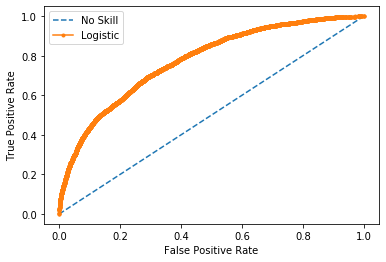

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Create a no skill prediction 
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = logreg_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test,lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test,lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [29]:
#Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, logreg_pred))
print()

value = (confusion_matrix(y_test, logreg_pred))
FP = value.sum(axis=0) - np.diag(value)  
FN = value.sum(axis=1) - np.diag(value)
TP = np.diag(value)
TN = value.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("True Positive Rate is:",TPR)
print()
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate is:",FPR)
print()
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#Classification Report
print("Classification Report: ")
print(classification_report(y_test, logreg_pred));

Confusion Matrix: 
[[5280 2269]
 [2227 5224]]

True Positive Rate is: [0.69943039 0.70111394]

False Positive Rate is: [0.29888606 0.30056961]

Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      7549
           1       0.70      0.70      0.70      7451

    accuracy                           0.70     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.70      0.70      0.70     15000



### 2. Logistic Regression With Interaction Terms

In [30]:
X_Added

,feat1,feat2,feat3,feat4,feat5,feat6,feat8,feat9,feat10,feat11,...,feat51,feat54,feat55,feat56,feat57,feat64,feat66,feat68,feat72,feat77
exampleid,,,,,,,,,,,,,,,,,,,,,
1,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,0.061477,-1.161654,-0.954001,...,0.0,-0.117079,0.0,1.635294,0.645488,0.452926,-1.047289,-0.522572,-0.292219,-0.149008
2,1.842888,2.481980,-2.349283,-2.544945,-0.315879,-0.222996,-0.008880,-0.985427,-0.395822,1.495993,...,0.0,-0.115488,0.0,1.635294,1.145015,-0.190966,1.054941,1.213067,4.799773,15.690849
3,1.718103,0.316003,0.792852,-2.544945,-0.315879,-0.222996,-0.008880,-0.165035,0.730047,-0.445924,...,0.0,-0.117061,0.0,-1.643688,-0.430416,-0.754172,-1.047289,1.651416,4.513291,-0.074553
4,-0.375070,-0.287393,0.198443,0.000153,3.622068,-0.222996,-3.113754,1.253732,-0.470801,-0.606142,...,0.0,-0.117086,0.0,-0.004197,-0.430416,-0.489914,-1.047289,-0.334054,-0.292219,-0.149008
5,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,0.566303,0.295861,-0.887189,...,0.0,-0.117086,0.0,-0.004197,-0.430416,-0.144287,-1.047289,0.077434,-0.292219,-0.149008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,-0.313360,-0.960450,-0.353798,...,0.0,-0.117086,0.0,-0.004197,-0.430416,-0.766594,1.054941,-0.334054,-0.292219,-0.149008
49997,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,-1.188425,-1.098384,0.132830,...,0.0,-0.117086,0.0,-0.004197,-0.430416,-0.117467,1.054941,-0.334054,-0.292219,-0.149008
49998,1.839087,3.141312,0.013042,-2.544945,-0.315879,-0.222996,-0.008880,2.499551,-1.317765,-0.548112,...,0.0,-0.117086,0.0,-0.004197,-0.430416,0.428157,1.054941,-0.334054,4.791047,0.615288


In [31]:
#Adding New Features as Interaction Terms
X_Added['feat1*feat4'] = X_Added['feat1']*X_Added['feat4']
X_Added['feat5*feat8'] = X_Added['feat5']*X_Added['feat8']
X_Added['feat13*feat14'] = X_Added['feat13']*X_Added['feat14']
X_Added['feat16*feat31'] = X_Added['feat16']*X_Added['feat31']

In [32]:
X_Added

,feat1,feat2,feat3,feat4,feat5,feat6,feat8,feat9,feat10,feat11,...,feat57,feat64,feat66,feat68,feat72,feat77,feat1*feat4,feat5*feat8,feat13*feat14,feat16*feat31
exampleid,,,,,,,,,,,,,,,,,,,,,
1,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,0.061477,-1.161654,-0.954001,...,0.645488,0.452926,-1.047289,-0.522572,-0.292219,-0.149008,-0.000057,0.002805,-0.029151,0.174009
2,1.842888,2.481980,-2.349283,-2.544945,-0.315879,-0.222996,-0.008880,-0.985427,-0.395822,1.495993,...,1.145015,-0.190966,1.054941,1.213067,4.799773,15.690849,-4.690049,0.002805,0.058091,-1.383529
3,1.718103,0.316003,0.792852,-2.544945,-0.315879,-0.222996,-0.008880,-0.165035,0.730047,-0.445924,...,-0.430416,-0.754172,-1.047289,1.651416,4.513291,-0.074553,-4.372477,0.002805,3.855448,1.034341
4,-0.375070,-0.287393,0.198443,0.000153,3.622068,-0.222996,-3.113754,1.253732,-0.470801,-0.606142,...,-0.430416,-0.489914,-1.047289,-0.334054,-0.292219,-0.149008,-0.000057,-11.278229,-0.000009,0.001735
5,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,0.566303,0.295861,-0.887189,...,-0.430416,-0.144287,-1.047289,0.077434,-0.292219,-0.149008,-0.000057,0.002805,0.000033,1.034341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,-0.313360,-0.960450,-0.353798,...,-0.430416,-0.766594,1.054941,-0.334054,-0.292219,-0.149008,-0.000057,0.002805,-0.018012,-0.000293
49997,-0.375070,-0.287393,0.198443,0.000153,-0.315879,-0.222996,-0.008880,-1.188425,-1.098384,0.132830,...,-0.430416,-0.117467,1.054941,-0.334054,-0.292219,-0.149008,-0.000057,0.002805,0.000050,-0.002320
49998,1.839087,3.141312,0.013042,-2.544945,-0.315879,-0.222996,-0.008880,2.499551,-1.317765,-0.548112,...,-0.430416,0.428157,1.054941,-0.334054,4.791047,0.615288,-4.680376,0.002805,0.190934,0.001735


In [33]:
# Splitting the new training dataset into 70:30 ratio for model building
train_dist = int(0.7 * len(X_Added))
X_Added_train, X_Added_test = X_Added[:train_dist], X_Added[train_dist:]
y_train, y_test = y[:train_dist], y[train_dist:]

In [34]:
from sklearn.linear_model import LogisticRegression

logreg_inter_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
logreg_inter_model = logreg_inter_model.fit(X_Added_train, y_train)
logreg_inter_pred = logreg_inter_model.predict(X_Added_test)
logreg_inter_RMSE = np.sqrt(mean_squared_error(y_test,logreg_inter_pred))
logreg_inter_model_features = X_Added_train.columns
print("Accuracy of Logistic Regression with Interaction Terms is ",(logreg_inter_model.score(X_Added_test, y_test) * 100))
print()
print("RMSE value of the Logistic Regression with Interaction Terms is ",logreg_inter_RMSE)
print()
print("Predicted values from Logistic Regression with Interaction Terms are ", logreg_inter_pred)

Accuracy of Logistic Regression with Interaction Terms is  70.78666666666666

RMSE value of the Logistic Regression with Interaction Terms is  0.5404936015655813

Predicted values from Logistic Regression with Interaction Terms are  [0 0 0 ... 1 1 0]


In [35]:
print("β0 for Logistic Regression with Interaction is ",logreg_inter_model.intercept_)
print()
print()
print("β values for Logistic Regression with Interaction are", list(zip(np.round(logreg_inter_model.coef_[0] ,4),logreg_inter_model_features)))

β0 for Logistic Regression with Interaction is  [-0.02282218]


β values for Logistic Regression with Interaction are [(0.0, 'feat1'), (0.0, 'feat2'), (-0.0019, 'feat3'), (-0.5818, 'feat4'), (0.0, 'feat5'), (0.0011, 'feat6'), (-0.4102, 'feat8'), (0.0045, 'feat9'), (0.0, 'feat10'), (0.0088, 'feat11'), (-0.0153, 'feat12'), (0.9455, 'feat13'), (0.4554, 'feat14'), (0.1753, 'feat15'), (-0.0003, 'feat16'), (-0.0005, 'feat17'), (0.1881, 'feat20'), (0.0036, 'feat21'), (0.0106, 'feat22'), (0.0026, 'feat23'), (0.0, 'feat24'), (0.0216, 'feat25'), (0.0258, 'feat26'), (0.012, 'feat28'), (0.0, 'feat29'), (-0.2233, 'feat31'), (0.0055, 'feat32'), (-0.0132, 'feat33'), (-0.0189, 'feat35'), (-0.0018, 'feat36'), (-0.0047, 'feat37'), (0.0, 'feat38'), (-0.0124, 'feat39'), (0.0293, 'feat42'), (0.0039, 'feat44'), (0.0, 'feat47'), (0.0, 'feat48'), (0.0, 'feat49'), (0.0, 'feat50'), (0.0, 'feat51'), (-0.001, 'feat54'), (0.0, 'feat55'), (0.0094, 'feat56'), (-0.0144, 'feat57'), (-0.0027, 'feat64'), (0.091, 'feat66

No Skill: ROC AUC=0.500
Interaction Logistic: ROC AUC=0.794


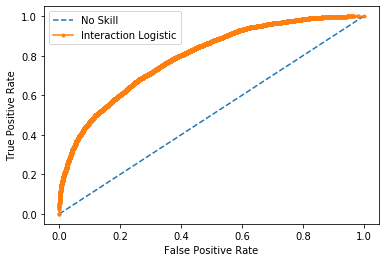

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
logreg_inter_probs = logreg_inter_model.predict_proba(X_Added_test)

# keep probabilities for the positive outcome only
logreg_inter_probs = logreg_inter_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
logreg_inter_auc = roc_auc_score(y_test,logreg_inter_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Interaction Logistic: ROC AUC=%.3f' % (logreg_inter_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logreg_inter_fpr, logreg_inter_tpr, _ = roc_curve(y_test,logreg_inter_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(logreg_inter_fpr, logreg_inter_tpr, marker='.', label='Interaction Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [37]:
#Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, logreg_inter_pred))
print()

value = (confusion_matrix(y_test, logreg_inter_pred))
FP = value.sum(axis=0) - np.diag(value)  
FN = value.sum(axis=1) - np.diag(value)
TP = np.diag(value)
TN = value.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("True Positive Rate is:",TPR)
print()
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate is:",FPR)
print()
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#Classification Report
print("Classification Report: ")
print(classification_report(y_test,logreg_inter_pred));

Confusion Matrix: 
[[5424 2125]
 [2257 5194]]

True Positive Rate is: [0.71850576 0.69708764]

False Positive Rate is: [0.30291236 0.28149424]

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      7549
           1       0.71      0.70      0.70      7451

    accuracy                           0.71     15000
   macro avg       0.71      0.71      0.71     15000
weighted avg       0.71      0.71      0.71     15000



### 3. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, max_features="auto", max_depth = 2, bootstrap = True, random_state = 0)
RF_model.fit(X_train,y_train)
RF_pred = RF_model.predict(X_test)
RF_RMSE = np.sqrt(mean_squared_error(y_test,RF_pred))
print("Accuracy of RandomForest Model is ",(RF_model.score(X_test, y_test) * 100))
print()
print("RMSE value of the RandomForest model is ",RF_RMSE)
print()
print("Predicted values from RandomForest Model are ", RF_pred)

Accuracy of RandomForest Model is  67.15333333333334

RMSE value of the RandomForest model is  0.5731201153917621

Predicted values from RandomForest Model are  [0 0 0 ... 1 1 0]


No Skill: ROC AUC=0.500
RandomForest: ROC AUC=0.732


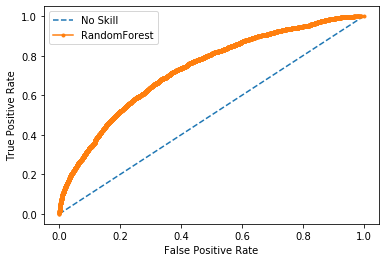

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
RF_probs = RF_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
RF_probs = RF_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
RF_auc = roc_auc_score(y_test,RF_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RandomForest: ROC AUC=%.3f' % (RF_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test,RF_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(RF_fpr, RF_tpr, marker='.', label='RandomForest')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [40]:
#Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, RF_pred))
print()
print()

value = (confusion_matrix(y_test, RF_pred))
FP = value.sum(axis=0) - np.diag(value)  
FN = value.sum(axis=1) - np.diag(value)
TP = np.diag(value)
TN = value.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("True Positive Rate is:",TPR)
print()
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate is:",FPR)
print()
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#Classification Report
print("Classification Report: ")
print(classification_report(y_test, RF_pred));

Confusion Matrix: 
[[5089 2460]
 [2467 4984]]


True Positive Rate is: [0.67412902 0.6689035 ]

False Positive Rate is: [0.3310965  0.32587098]

Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      7549
           1       0.67      0.67      0.67      7451

    accuracy                           0.67     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.67      0.67      0.67     15000



### 4. Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.1, max_features="auto", max_depth = 2, random_state = 0)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_RMSE = np.sqrt(mean_squared_error(y_test,gb_pred))
print("Accuracy of Gradient Boosting Model is ",(gb_model.score(X_test, y_test) * 100))
print()
print("RMSE value of the Gradient Boosting model is ",gb_RMSE)
print()
print("Predicted values from Gradient Boosting Model are ", gb_pred)

Accuracy of Gradient Boosting Model is  69.61333333333334

RMSE value of the Gradient Boosting model is  0.5512410241143766

Predicted values from Gradient Boosting Model are  [0 0 0 ... 1 1 0]


No Skill: ROC AUC=0.500
GradientBoosting: ROC AUC=0.779


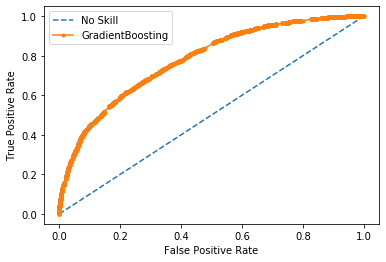

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
gb_probs = gb_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
gb_auc = roc_auc_score(y_test,gb_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GradientBoosting: ROC AUC=%.3f' % (gb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test,gb_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='GradientBoosting')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [43]:
#Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, gb_pred))
print()

value = (confusion_matrix(y_test, gb_pred))
FP = value.sum(axis=0) - np.diag(value)  
FN = value.sum(axis=1) - np.diag(value)
TP = np.diag(value)
TN = value.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("True Positive Rate is:",TPR)
print()
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate is:",FPR)
print()
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#Classification Report
print("Classification Report: ")
print(classification_report(y_test, gb_pred));

Confusion Matrix: 
[[5398 2151]
 [2407 5044]]

True Positive Rate is: [0.7150616  0.67695611]

False Positive Rate is: [0.32304389 0.2849384 ]

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      7549
           1       0.70      0.68      0.69      7451

    accuracy                           0.70     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.70      0.70      0.70     15000



### COMPARISION

In [44]:
print("Accuracy of Logistic Regression Without Interaction Terms is %.2f"  % (logreg_model.score(X_test, y_test) * 100))
print("Accuracy of Logistic Regression with Interaction Terms is %.2f"  % (logreg_inter_model.score(X_Added_test, y_test) * 100))
print("Accuracy of RandomForest Model is %.2f"  % (RF_model.score(X_test, y_test) * 100))
print("Accuracy of Gradient Boosting Model is %.2f"  % (gb_model.score(X_test, y_test) * 100))
print()
print()
print('Logistic: ROC AUC=%.3f' % (lr_auc * 100))
print('Interaction Logistic: ROC AUC=%.3f' % (logreg_inter_auc * 100))
print('RandomForest: ROC AUC=%.3f' % (RF_auc * 100))
print('GradientBoosting: ROC AUC=%.3f' % (gb_auc * 100))

Accuracy of Logistic Regression Without Interaction Terms is 70.03
Accuracy of Logistic Regression with Interaction Terms is 70.79
Accuracy of RandomForest Model is 67.15
Accuracy of Gradient Boosting Model is 69.61


Logistic: ROC AUC=77.641
Interaction Logistic: ROC AUC=79.351
RandomForest: ROC AUC=73.224
GradientBoosting: ROC AUC=77.941
